# Spectral embedding visualization in R

In [1]:
library(ggplot2)

In [51]:
tsne=read.table('tsne_xy')

names(tsne)<-c('x','y')
candidates=read.table('../UrlRetrieval/speech_list.csv',sep="\t",quote = "",colClasses = c("character","character","character","character"))
tsne$candidate=candidates$V1

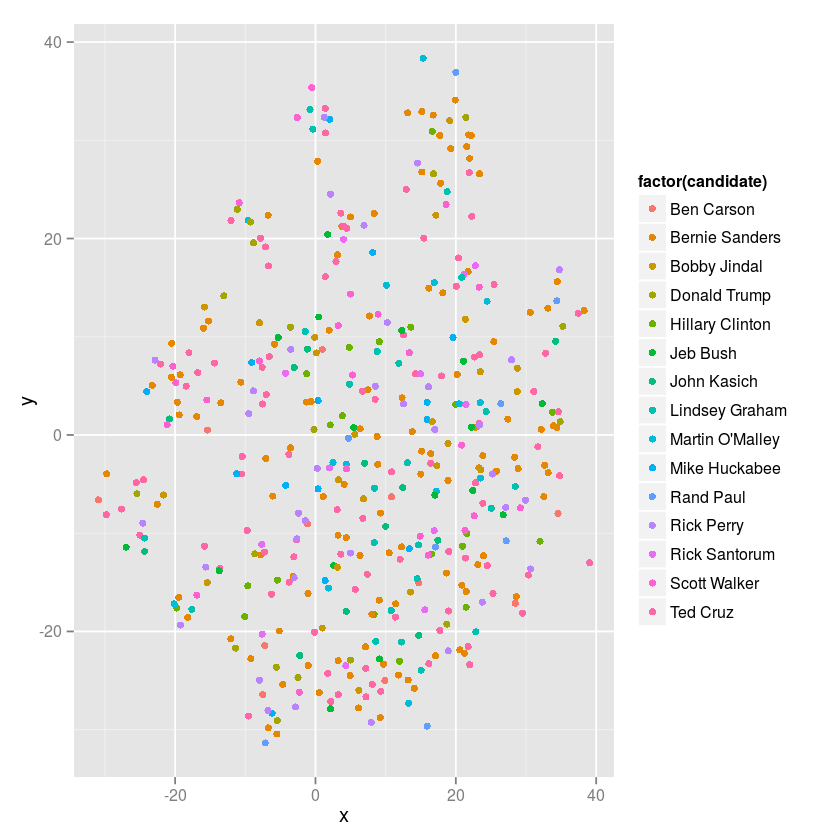

In [52]:
ggplot(tsne,aes(x=x,y=y,color=factor(candidate)))+geom_point()

In [53]:
library(data.table)

In [55]:
tsne_dt=as.data.table(tsne)
avg_tsne=tsne_dt[,list(mean(x),mean(y)),by="candidate"]

In [59]:
rep(1,each=3)

[1] 1 1 1

In [60]:
avg_tsne$party=c(rep('R',each=3),rep('D',each=12))

In [91]:
avg_tsne$xoffset=0
avg_tsne$yoffset=0

In [98]:
avg_tsne


,candidate,V1,V2,party,xoffset,yoffset
1,Hillary Clinton,9.524716,-4.7175,R,0,0
2,Bernie Sanders,8.7675,-0.7833634,R,0,0
3,Martin O'Malley,10.2704,2.508949,R,0,0
4,Donald Trump,1.506678,0.1075282,D,0,0
5,John Kasich,4.051662,-6.176588,D,0,0
6,Ted Cruz,6.253953,-1.974023,D,0,0
7,Ben Carson,3.388777,-11.43218,D,0,0
8,Jeb Bush,8.102977,-2.741167,D,0,-0.7
9,Rick Santorum,8.63874,-1.383797,D,0,0
10,Rand Paul,17.32237,-3.713452,D,0,0


In [101]:
avg_tsne$yoffset[8]=-0.6
avg_tsne$xoffset[15]=-1

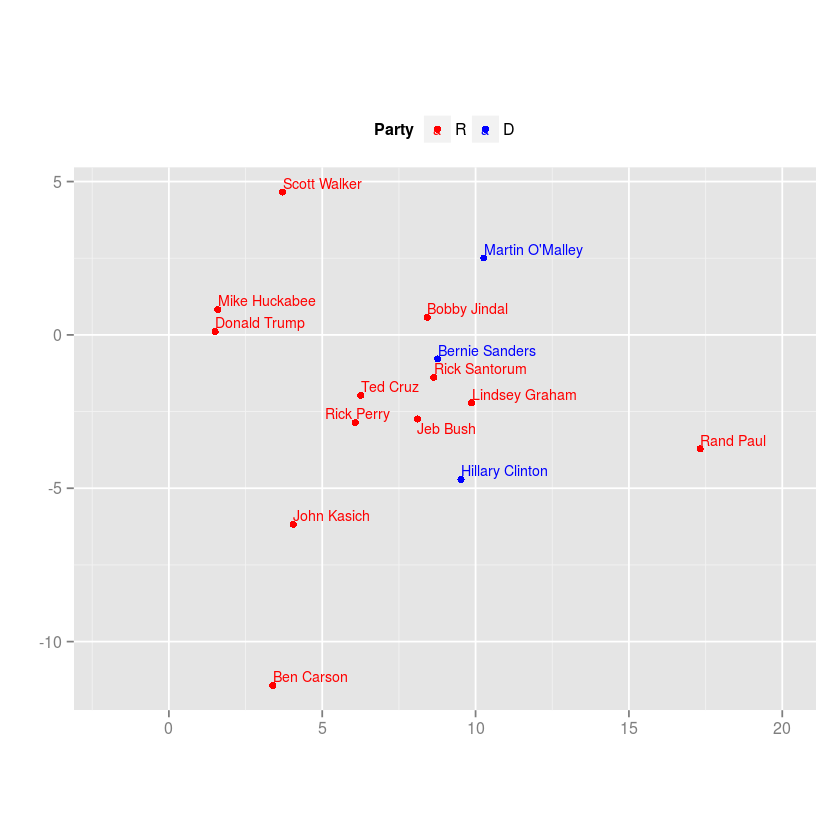

In [102]:
p=ggplot(avg_tsne,aes(x=V1,y=V2,color=factor(party)))+
    scale_color_manual(labels = c('R','D'),values = c('red','blue'),name="Party")+
    geom_point()+
    geom_text(aes(label=candidate,x=V1+xoffset,y=V2+yoffset),size=3,hjust=0,vjust=-0.3)+
    xlim(-2,20)+
    theme(legend.position="top")+
    xlab("")+
    ylab("")+
    coord_fixed()

p
ggsave(filename = "spectral_projections_candidates.png",width = 6,height = 6)

# Sentiment analysis visualization

In [16]:
library(reshape)
sent_table=read.table('../RemarksAndStatement/topic_sen_matrix.txt',sep='\t',header = T)
names(sent_table)[1]<-"candidate"

In [17]:
sent_table$freedom=NULL
sent_table$education_care=NULL
sent_table

,candidate,middle_east,homeland_security,immigration
1,Bush,-0.58,-0.2,-0.32
2,Graham,-0.51,-0.79,-0.31
3,Jindal,-0.43,-0.64,-0.38
4,Clinton,-0.29,-0.06,-0.15
5,Sanders,-0.24,-0.16,-0.27
6,Walker,-0.24,-0.28,-0.27
7,Cruz,-0.12,-0.12,-0.2
8,Perry,-0.1,-0.2,-0.16
9,Trump,0.01,0.21,0.13


In [18]:
sent_table=melt(sent_table, id=c("candidate")) 

In [19]:
head(sent_table)

,candidate,variable,value
1,Bush,middle_east,-0.58
2,Graham,middle_east,-0.51
3,Jindal,middle_east,-0.43
4,Clinton,middle_east,-0.29
5,Sanders,middle_east,-0.24
6,Walker,middle_east,-0.24


In [20]:
dict=data.frame(V1=unique(sent_table$variable),ylabs=c("Middle East","Domestic Security","Immigration"))

In [21]:
sent_table=merge(sent_table,dict,by.x= "variable",by.y="V1")

In [22]:
sent_table$candidate=factor(sent_table$candidate, levels = unique(sent_table$candidate))

Warning message:
: Stacking not well defined when ymin != 0Warning message:
: Stacking not well defined when ymin != 0Warning message:
: Stacking not well defined when ymin != 0Warning message:
: Stacking not well defined when ymin != 0Warning message:
: Stacking not well defined when ymin != 0Warning message:
: Stacking not well defined when ymin != 0

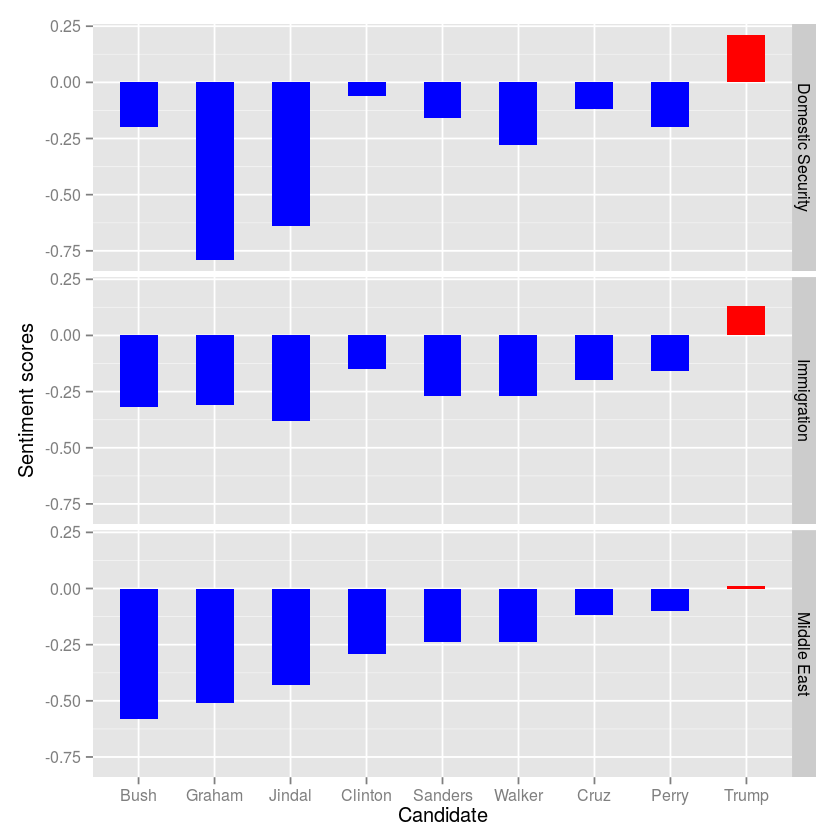

In [30]:
p2=ggplot(sent_table)+
    geom_bar(aes(x=candidate,y=value,fill=factor(sign(value))),stat="identity",width=.5)+
    facet_grid(ylabs~.)+
    scale_fill_manual(labels=c(1,-1),values = c('blue','red'))+
    guides(fill=FALSE)+
    ylab("Sentiment scores")+
    xlab("Candidate")

p2

ggsave("sentiment_analysis.png",p2,width = 6,height = 5)